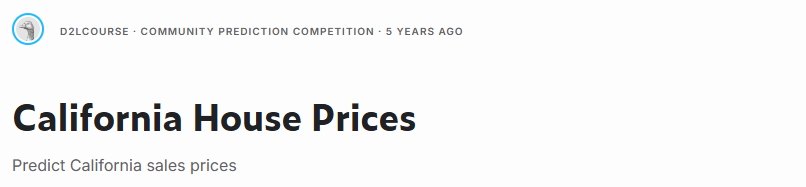

# california house price 예측

Kaggle 링크: <br>
https://www.kaggle.com/competitions/california-house-prices/overview

#### 1. Kaggle 패키지 설치 

In [ ]:
%pip install kaggle

#### 2. kaggle 인증

In [ ]:
# .env파일 만들기
# KAGGLE_API_TOKEN ="KGAT_e656685~~~"
# python-dotenv로 .env 키값을 불러오기
import os
from dotenv import load_dotenv

load_dotenv()

# 환경 변수 KAGGLE_API_TOKEN를 확인
#print(os.getenv("KAGGLE_API_TOKEN"))

True

#### 3. 데이터 가져오기

In [ ]:
# kaggle 패키지를 사용해서 데이터를 다운로드
!kaggle competitions download -c california-house-prices

In [ ]:
import os

# 프로젝트의 홈 디렉토리
HOME = os.getcwd()
# 압축파일이 있는 경로
zipPath = os.path.join(HOME, 'california-house-prices.zip')
# 압축파일을 풀 경로
targetPath = os.path.join(HOME,'data', 'california-house-prices')

print(zipPath)
print(targetPath)

c:\Users\park0\github\sklearn-est15th\california-house-prices.zip
c:\Users\park0\github\sklearn-est15th\data\california-house-prices


In [3]:
from zipfile import ZipFile

with ZipFile(zipPath, 'r') as zip_ref:
    zip_ref.extractall(targetPath)


#### train.csv, test.csv파일의 경로 문자열 생성

In [6]:
trainPath = os.path.join(targetPath, 'train.csv')
testPath = os.path.join(targetPath, 'test.csv')
#trainPath

In [7]:
import pandas as pd

train_df = pd.read_csv(trainPath)
train_df.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [14]:
train_df.loc[1,'Summary']

'HURRY, HURRY.......Great house 3 bed and 2 baths, detached  2 car garage with plenty of parking in the back,  interior remodeled, brand new kitchen, flooring, paint, appliances, mini split wall A/C Heater unit, new water heater and new windows, etc....Please come see it to appreciate it.'

In [15]:
train_df.columns

Index(['Id', 'Address', 'Sold Price', 'Summary', 'Type', 'Year built',
       'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
       'Full bathrooms', 'Total interior livable area', 'Total spaces',
       'Garage spaces', 'Region', 'Elementary School',
       'Elementary School Score', 'Elementary School Distance',
       'Middle School', 'Middle School Score', 'Middle School Distance',
       'High School', 'High School Score', 'High School Distance', 'Flooring',
       'Heating features', 'Cooling features', 'Appliances included',
       'Laundry features', 'Parking features', 'Tax assessed value',
       'Annual tax amount', 'Listed On', 'Listed Price', 'Last Sold On',
       'Last Sold Price', 'City', 'Zip', 'State'],
      dtype='object')

In [19]:
train_df['Heating'].unique()

array(['Heating - 2+ Zones, Central Forced Air - Gas', 'Combination',
       'Forced air', ...,
       'Propane, Central, Fireplace(s), Forced Air, Solar',
       'Fireplace Insert, Fireplace(s), Forced Air, Zoned, Natural Gas',
       'Forced air, Stove, Electric, Solar, Wood / Pellet'], dtype=object)

In [ ]:
# 컬럼(Features)의 갯수는 41개
# 데이터의 수 : 47439개
# 결측치가 여러개의 컬럼에서 존재
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47439 entries, 0 to 47438
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           47439 non-null  int64  
 1   Address                      47439 non-null  object 
 2   Sold Price                   47439 non-null  float64
 3   Summary                      47085 non-null  object 
 4   Type                         47439 non-null  object 
 5   Year built                   46394 non-null  float64
 6   Heating                      40587 non-null  object 
 7   Cooling                      26745 non-null  object 
 8   Parking                      46065 non-null  object 
 9   Lot                          33258 non-null  float64
 10  Bedrooms                     44567 non-null  object 
 11  Bathrooms                    43974 non-null  float64
 12  Full bathrooms               39574 non-null  float64
 13  Total interior l

### 컬럼 설명 (Data Dictionary)

| 컬럼명 | 설명 | 타입 |
|--------|------|------|
| **Id** | 고유 식별자 | int |
| **Address** | 주택 주소 | str |
| **Sold Price** | 판매 가격 (USD) - **타겟 변수** | float |
| **Summary** | 매물 설명 텍스트 | str |
| **Type** | 주택 유형 (SingleFamily, Condo, Townhouse, VacantLand 등) | str |
| **Year built** | 건축 연도 | float |
| **Heating** | 난방 시스템 유형 | str |
| **Cooling** | 냉방 시스템 유형 | str |
| **Parking** | 주차 시설 유형 | str |
| **Lot** | 대지 면적 (평방피트, sqft) | float |
| **Bedrooms** | 침실 수 | object |
| **Bathrooms** | 욕실 수 | float |
| **Full bathrooms** | 완전한 욕실 수 (샤워/욕조 포함) | float |
| **Total interior livable area** | 실내 거주 가능 면적 (sqft) | float |
| **Total spaces** | 총 주차 공간 수 | float |
| **Garage spaces** | 차고 주차 공간 수 | float |
| **Region** | 지역/도시명 | str |
| **Elementary School** | 인근 초등학교 이름 | str |
| **Elementary School Score** | 초등학교 평점 (1-10) | float |
| **Elementary School Distance** | 초등학교까지 거리 (마일) | float |
| **Middle School** | 인근 중학교 이름 | str |
| **Middle School Score** | 중학교 평점 (1-10) | float |
| **Middle School Distance** | 중학교까지 거리 (마일) | float |
| **High School** | 인근 고등학교 이름 | str |
| **High School Score** | 고등학교 평점 (1-10) | float |
| **High School Distance** | 고등학교까지 거리 (마일) | float |
| **Flooring** | 바닥재 종류 (Tile, Hardwood, Carpet 등) | str |
| **Heating features** | 난방 세부 특성 | str |
| **Cooling features** | 냉방 세부 특성 | str |
| **Appliances included** | 포함된 가전제품 목록 | str |
| **Laundry features** | 세탁 시설 특성 | str |
| **Parking features** | 주차 시설 세부 특성 | str |
| **Tax assessed value** | 세금 평가 가치 (USD) | float |
| **Annual tax amount** | 연간 재산세 금액 (USD) | float |
| **Listed On** | 매물 등록일 | str (date) |
| **Listed Price** | 매물 등록 가격 (USD) | float |
| **Last Sold On** | 마지막 판매일 | str (date) |
| **Last Sold Price** | 마지막 판매 가격 (USD) | float |
| **City** | 도시명 | str |
| **Zip** | 우편번호 | int |
| **State** | 주 (CA = California) | str |

**참고사항:**
- 학교 점수(Score)는 GreatSchools 기준 1-10점 척도
- 거리(Distance)는 마일 단위
- 면적은 평방피트(sqft) 단위 (1 sqft ≈ 0.093 m²)
- 가격은 미국 달러(USD) 단위

In [9]:
train_df.describe()

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,47439.000000,4.743900e+04,46394.000000,3.325800e+04,43974.000000,39574.000000,4.491300e+04,46523.000000,46522.000000,42543.000000,42697.000000,30734.000000,30735.000000,42220.000000,42438.000000,4.378700e+04,43129.000000,4.743900e+04,2.967300e+04,47439.000000
mean,23719.000000,1.296050e+06,1956.634888,2.353383e+05,2.355642,2.094961,5.774587e+03,1.567117,1.491746,5.720824,1.152411,5.317206,1.691593,6.134344,2.410366,7.863118e+05,9956.843817,1.315890e+06,8.078537e+05,93279.178587
std,13694.604047,1.694452e+06,145.802456,1.192507e+07,1.188805,0.963320,8.324363e+05,9.011608,8.964319,2.103350,2.332367,2.002768,2.462879,1.984711,3.596120,1.157796e+06,13884.254976,2.628695e+06,1.177903e+06,2263.459104
min,0.000000,1.005000e+05,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,85611.000000
25%,11859.500000,5.650000e+05,1946.000000,4.991000e+03,2.000000,2.000000,1.187000e+03,0.000000,0.000000,4.000000,0.300000,4.000000,0.600000,5.000000,0.800000,2.549615e+05,3467.000000,5.745000e+05,3.350000e+05,90220.000000
50%,23719.000000,9.600000e+05,1967.000000,6.502000e+03,2.000000,2.000000,1.566000e+03,1.000000,1.000000,6.000000,0.500000,5.000000,1.000000,6.000000,1.300000,5.475240e+05,7129.000000,9.490000e+05,5.980000e+05,94114.000000
75%,35578.500000,1.525000e+06,1989.000000,1.045400e+04,3.000000,2.000000,2.142000e+03,2.000000,2.000000,7.000000,1.000000,7.000000,1.800000,8.000000,2.400000,9.371625e+05,12010.000000,1.498844e+06,9.500000e+05,95073.000000
max,47438.000000,9.000000e+07,9999.000000,1.897474e+09,24.000000,17.000000,1.764164e+08,1000.000000,1000.000000,10.000000,57.200000,9.000000,57.200000,10.000000,73.900000,4.590000e+07,552485.000000,4.025320e+08,9.000000e+07,96155.000000
